In [1]:
try:
    ! pip install matplotlib --upgrade
except:
    ! pip install matplotlib --upgrade --user

Defaulting to user installation because normal site-packages is not writeable


<div class = "alert alert-info" style="border-left: 7px solid RED">
<b></b>
    
**После обновления модуля `matplotlib`, требуется перезапуск ядра!**
</div>

In [2]:
import matplotlib 
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.6.2


# Анализ данных интернет-магазина "Стримчик"

**Описание проекта**
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Описание данных**

- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

**План и цели проекта**

- Подготовка данных
- Иследовательский анализ данных
- Составление портрета пользователя каждого региона
- Проверка гипотез: 

`Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;`.

`Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.`

- Общий вывод


# Шаг 1.
## Ознакомление с датасетом

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import scipy.stats as st
import warnings
import markdown

warnings.filterwarnings('ignore')

In [4]:
try:
  df = pd.read_csv('games.csv')
except:
  df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


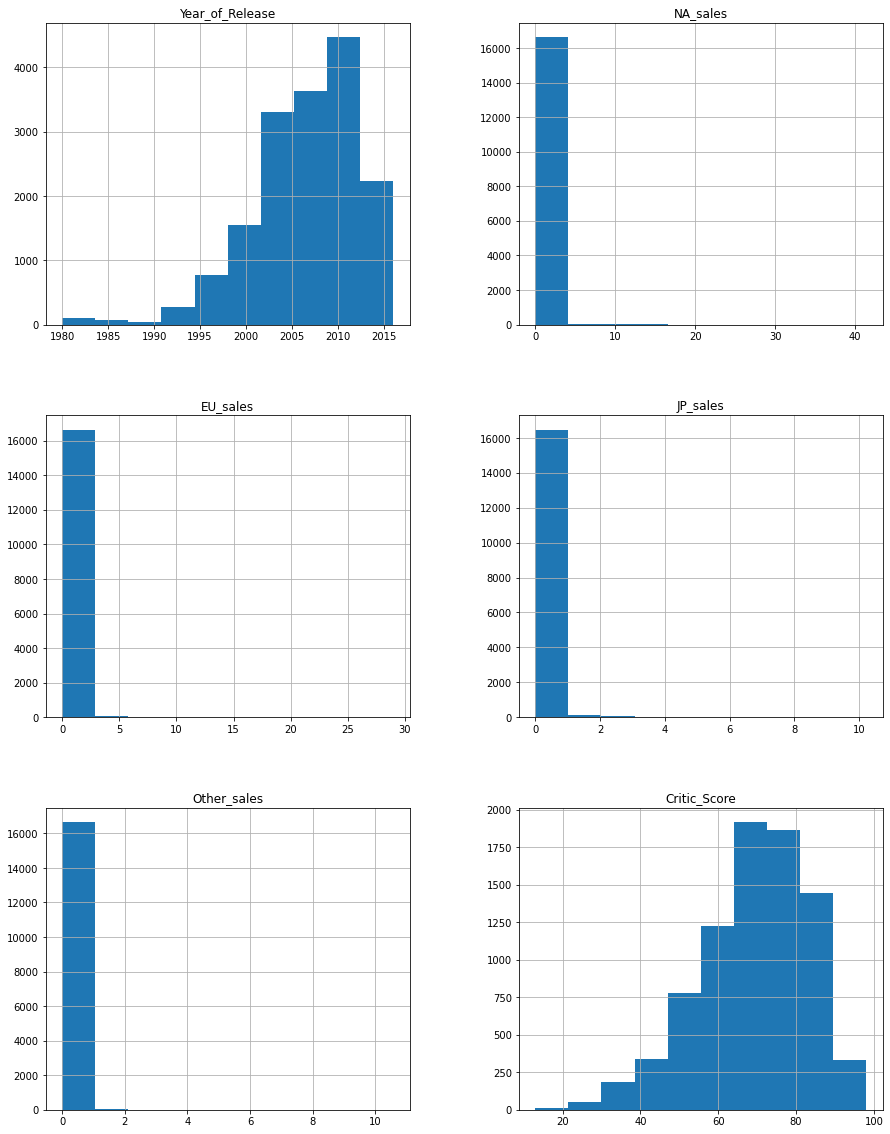

In [6]:
df.hist(figsize=(15,20));

In [7]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [8]:
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
Name,0.000000
Platform,0.000000
Year_of_Release,2.000000
Genre,0.000000
NA_sales,0.000000
EU_sales,0.000000
JP_sales,0.000000
Other_sales,0.000000
Critic_Score,51.000000
User_Score,40.000000


**Первый взгляд на датасет**

- `Name` - наличие пропусков
- `Year_of_Release` наличие пропусков и неправильный тип
- `Genre` - наличие пропусков
- `Critic_Score` - наличие пропусков
- `User_Score` - наличие пропусков и неправильный тип
- `Rating` - наличие пропусков

Так же видим, что названия столбцов находятся в разном регистре. Исправим это

# Шаг 2.

## Подготовка данных

In [9]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

**Приведем к нижнему регистру данные в столбцах содержащих текст**

In [10]:
for column in ['name','platform','genre','rating']:
    df[column] = df[column].str.lower()

**Всего 2% пропущенных значений в столбце год релиза, удалим строки и изменим тип на целое число**

In [11]:
df = df.dropna(subset=['year_of_release'])
df['year_of_release'] = df['year_of_release'].astype('int')
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8,e
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8,e
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**В столбце оценки пользователей присутствует аббревиатура 'tbd' (to be determined), чтобы удобней было работать с данными, заменим 'tbd' на NaN.**

In [12]:
df['user_score'] = df['user_score'].replace('tbd', np.NaN)
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

**Изменим формат ячеек `user_score`**

In [13]:
df['user_score'] = df['user_score'].astype('float64')

In [14]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,gen,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,gen,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


**Наличие пропусков в столбцах `name` и `genre` составляет всего 2 строки и имеют пропуски почти во всех столбцах, удалим эти строки**

In [15]:
df = df.dropna(subset=['name'])
df.reset_index(drop=True)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16439,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16440,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16441,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16442,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


**Заменим пропуски в `rating` на "не определен" 'tbd'**

In [16]:
df['rating'] = df['rating'].fillna('tbd')

In [17]:
df['rating'].unique()

array(['e', 'tbd', 'm', 't', 'e10+', 'k-a', 'ao', 'ec', 'rp'],
      dtype=object)

In [18]:
df.duplicated().sum()

0

**Посчитаем суммарные продажи во всех регионах и запишием их в отдельный столбец. `total_sales`**

In [19]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,tbd,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,tbd,31.38


### Вывод

Изменили типы столбцов, избавились от пропусков, где это было возможно, что касается оставшихся пропусков, для их устранения недостаточно данных, а удаление может привести к большой потери данных. Проверили датасет на дубликаты (отсутствуют) и добавили столбец `total_sales` - суммарная продажа во всех регионах.

# Шаг 3.

## Исследовательский анализ данных

### Посмотрим, сколько игр выпускалось в разные годы

count    16444.000000
mean      2006.486256
std          5.875525
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

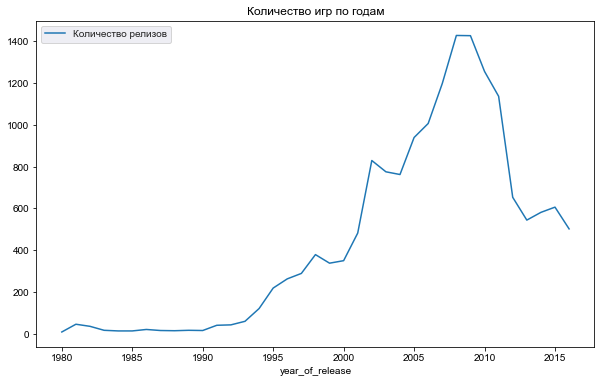

In [20]:
count_of_year = df.pivot_table(index='year_of_release', values='name', aggfunc='count')
plt.figure(figsize=(10,6))
sbn.lineplot(data=count_of_year)
sbn.set_style('darkgrid')
plt.title("Количество игр по годам")
plt.legend(['Количество релизов'])
df['year_of_release'].describe()

In [21]:
sample11 = df.groupby('year_of_release') 
sample11['name'].describe()

,count,unique,top,freq
year_of_release,,,,
1980,9,9,asteroids,1
1981,46,46,pitfall!,1
1982,36,36,pac-man,1
1983,17,17,baseball,1
1984,14,14,duck hunt,1
1985,14,14,super mario bros.,1
1986,21,21,the legend of zelda,1
1987,16,16,zelda ii: the adventure of link,1
1988,15,15,super mario bros. 3,1


Как мы видим по графику, начиная с `1990` года количество выпущенных игр начало значительно увеличиваться, пик выпущенных игр пришелся на `2007-2010` года. Начиная с `2000` года количество выпущенных игр в год не опускалось ниже `400` игр в год. Увеличение релизов еще связано с тем, что увеличивалось число различных платформ и некоторые игры выпускались сразу на нескольких платформах.

### Посмотрим, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [22]:
platforms_leaders = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

count      31.000000
mean      284.334516
std       343.954144
min         0.030000
25%        22.150000
50%       200.040000
75%       301.205000
max      1233.560000
Name: total_sales, dtype: float64

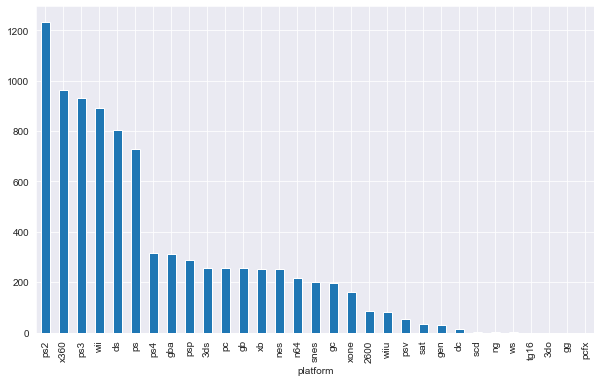

In [23]:
platforms_leaders.plot(kind='bar', grid=True, figsize=(10,6))
platforms_leaders.describe()

**Возьмем топ6 самых выделяющихся платформ и создатим список с их названиями. Посмотрим распределение по годам для каждой платформы**

In [24]:
top_platforms_list = ['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps']
top_platforms_list

['ps2', 'x360', 'ps3', 'wii', 'ds', 'ps']

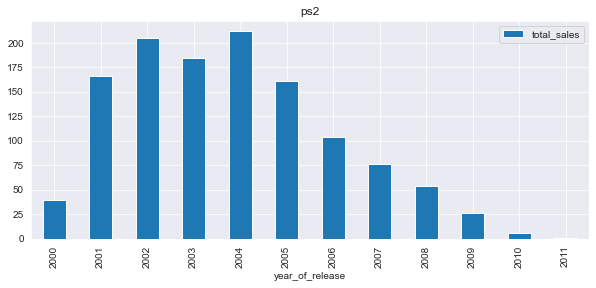

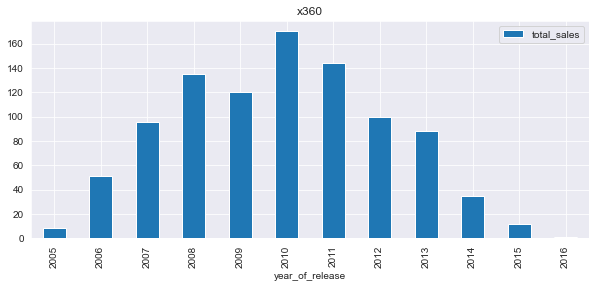

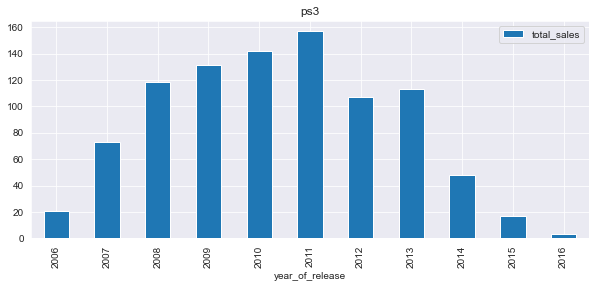

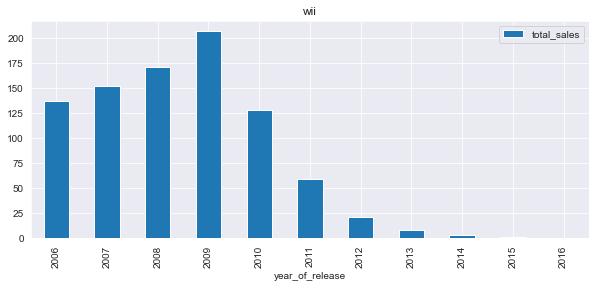

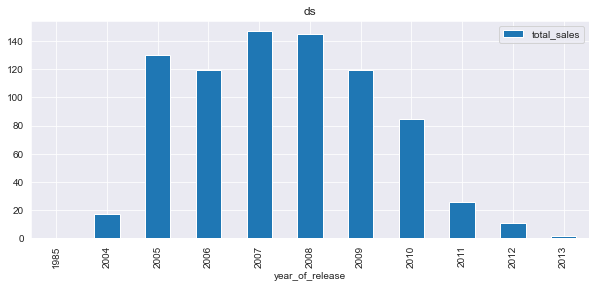

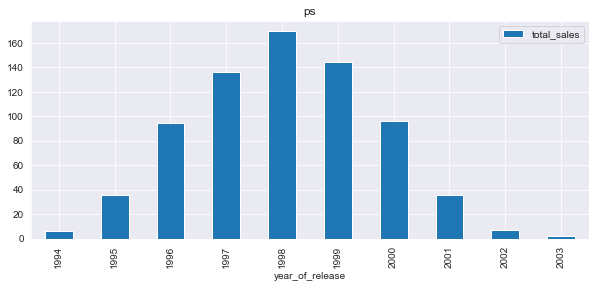

In [25]:
for platform in top_platforms_list:
    df[df['platform'] == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(
        kind='bar', figsize=(10,4))
    plt.title(platform)

**Взглянув на диаграммы распределения, можно сделать вывод, что в среднем платформы популярны 8-10 лет.
На смену одной платформе приходит другая, допустим в начале 2000х `PS` теряет популярность, потому что производитель `Sony` выпускает `PS2` и так далее и по сей день.**

---------------------------------------------

### Возьмем период где данные наиболее волатильны это с 2014 по 2016 год, и мы увидим в данных более менее современные платформы которые будут отражать текущую действительность

In [26]:
actual_period_df = df[df['year_of_release'] >= 2014]
actual_period_df.reset_index()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,tbd,14.63
1,42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,m,12.62
2,47,pokemon omega ruby/pokemon alpha sapphire,3ds,2014,role-playing,4.35,3.49,3.10,0.74,NaN,NaN,tbd,11.68
3,77,fifa 16,ps4,2015,sports,1.12,6.12,0.06,1.28,82.0,4.3,e,8.58
4,87,star wars battlefront (2015),ps4,2015,shooter,2.99,3.49,0.22,1.28,NaN,NaN,tbd,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1684,16703,strawberry nauts,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,tbd,0.01
1685,16707,aiyoku no eustia,psv,2014,misc,0.00,0.00,0.01,0.00,NaN,NaN,tbd,0.01
1686,16710,samurai warriors: sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,NaN,tbd,0.01
1687,16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,NaN,tbd,0.01


### Посмотрим какие платформы лидируют по продажам в актуальном периоде, растут или падают?

In [27]:
actual_platforms_leaders = actual_period_df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

count     10.000000
mean      72.945000
std       86.355404
min        0.360000
25%       23.562500
50%       45.600000
75%       82.055000
max      288.150000
Name: total_sales, dtype: float64

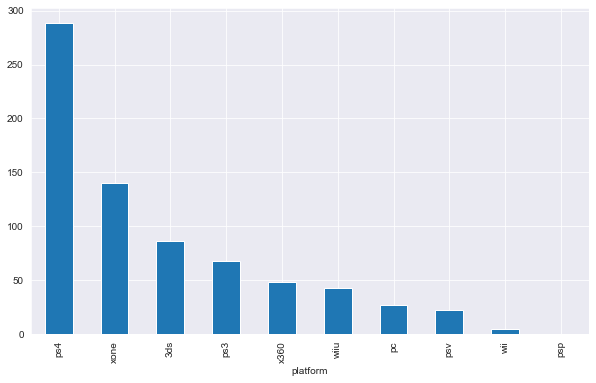

In [28]:
actual_platforms_leaders.plot(kind='bar', grid=True, figsize=(10,6))
actual_platforms_leaders.describe()

In [29]:
actual_top_platforms_list = ['ps4', 'xone', '3ds', 'ps3', 'x360']
actual_top_platforms_list

['ps4', 'xone', '3ds', 'ps3', 'x360']

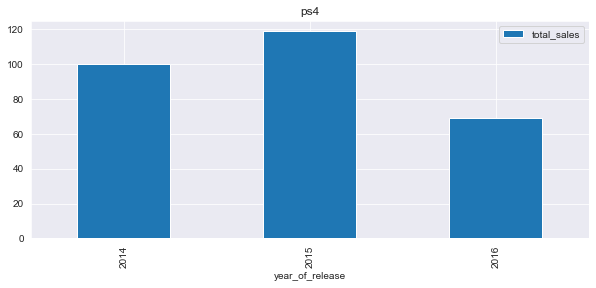

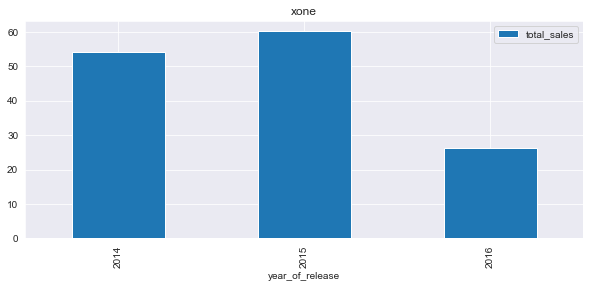

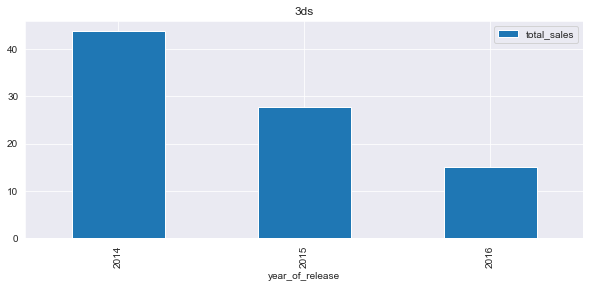

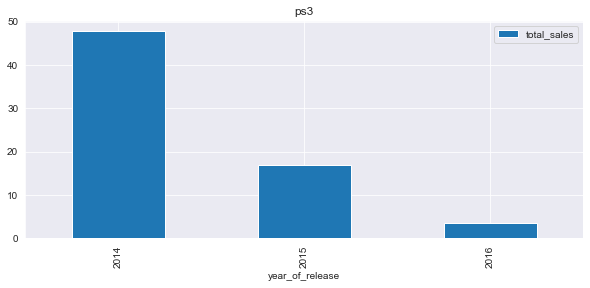

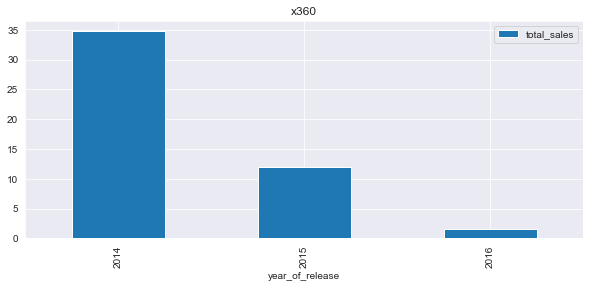

In [30]:
for platform in actual_top_platforms_list:
    actual_period_df[actual_period_df['platform'] == platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(
        kind='bar', figsize=(10,4))
    plt.title(platform)

**Взглянув на диаграммы распределения, можно сделать вывод, что среди платформ уверенно лидирует `Ps4`, так же видим, как в период с 2014-2015 год на смену старым версиям приставок `x360` и `ps3` пришло новое поколение приставок `Ps4` и `xone`. Данные за 2016 год немного искажают видимость, потому что в базе данных представлен не весь год.**

### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

In [31]:
list_of_top_6 = ['ps4','xone','pc','wiiu','3ds', 'psv']
top_6_platforms = actual_period_df[actual_period_df['platform'].isin(['ps4','xone','pc','wiiu','3ds', 'psv'])]


In [32]:
top_6_platforms['total_sales'].describe()

count    1335.000000
mean        0.455146
std         1.142703
min         0.010000
25%         0.030000
50%         0.090000
75%         0.340000
max        14.630000
Name: total_sales, dtype: float64

In [33]:
top_6_platforms.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3ds,212.0,0.408868,1.188368,0.01,0.0300,0.090,0.2500,11.68
pc,151.0,0.179139,0.329359,0.01,0.0200,0.060,0.2000,3.05
ps4,376.0,0.766356,1.614969,0.01,0.0575,0.185,0.6900,14.63
psv,295.0,0.075932,0.141591,0.01,0.0200,0.040,0.0900,1.96
wiiu,73.0,0.588767,1.161467,0.01,0.0500,0.190,0.5700,7.09
xone,228.0,0.615614,1.046513,0.01,0.0500,0.205,0.6325,7.39


Text(0, 0.5, 'Общие продажи')

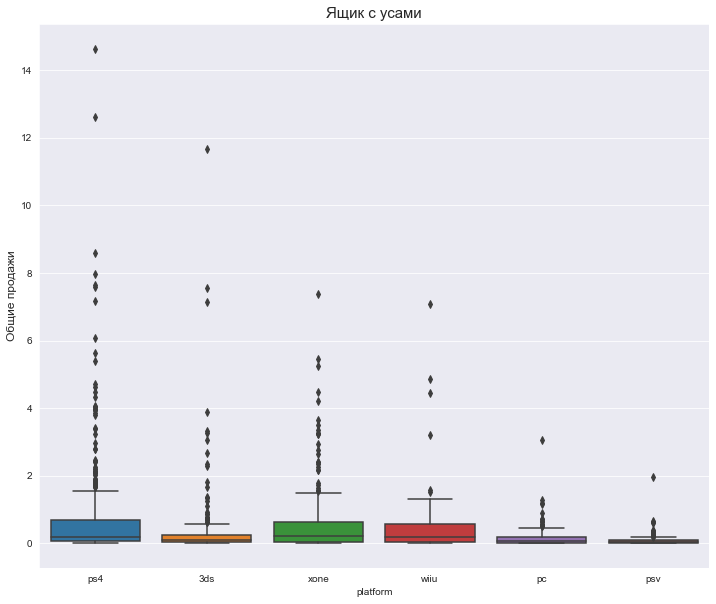

In [34]:
plt.figure(figsize=(12,10))
sbn.boxplot(data=top_6_platforms, x='platform', y='total_sales')
plt.title('Ящик с усами', fontsize=15)
plt.ylabel('Общие продажи',fontsize=12)

Text(0, 0.5, 'Общие продажи')

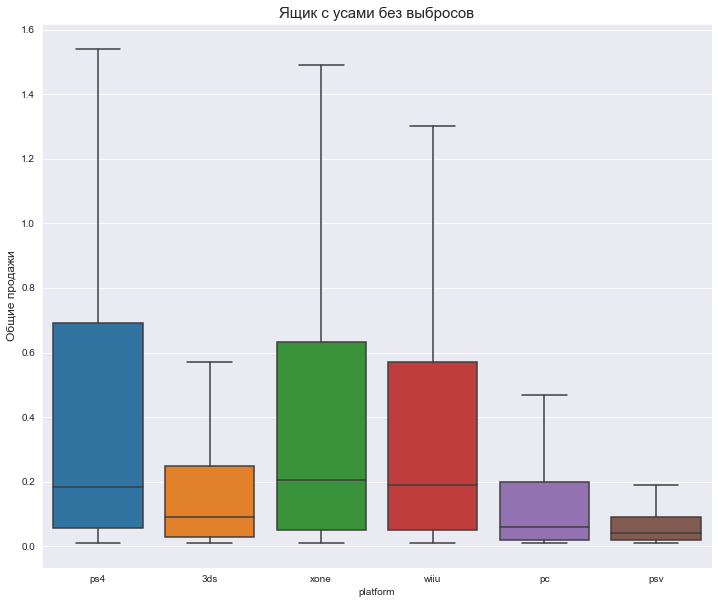

In [35]:

plt.figure(figsize=(12,10))
sbn.boxplot(data=top_6_platforms, x='platform', y='total_sales', showfliers=False)
plt.title('Ящик с усами без выбросов', fontsize=15)
plt.ylabel('Общие продажи',fontsize=12)

**Как мы видим больше всех продаж у WiiU и XOne, далее идут PS4, 3DS, PC и PSV на последнем месте. Исходя из графиков и описания видно, что медиана протекает у всех по разному.**
- Успех WiiU можно понять по причине цен относительно остальных приставок, в кризис 2008 года, Wii была спасением для многих семей, на консоль была поставлена цена в 200 долларов, в отличии от Xbox 360 и PS3 за 300долларов и 500долларов соответственно. 
- Положение Xbox One и PlayStation 4 можно объяснить тем, что данные приставки позднее остальных вышли на рынки. Часть стран увидела их в конце 2013, часть только во второй половине 2014.  
- ПК на данном промежутке времени отошли на второй план, уступив место приставкам.

----------------------------------

### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построем диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

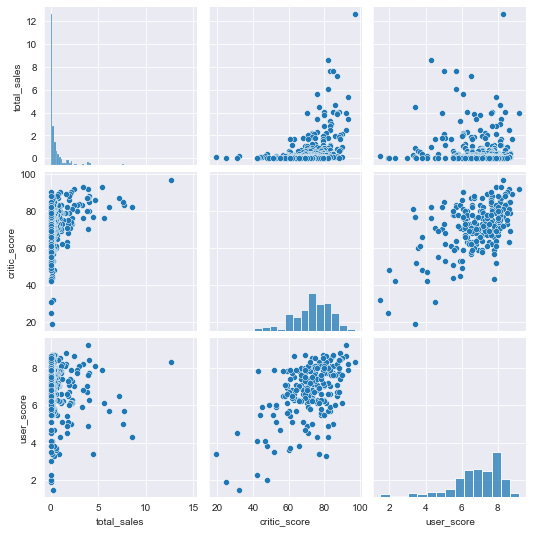

In [36]:
sbn.pairplot(actual_period_df[actual_period_df['platform'] == "ps4"][['total_sales', 'critic_score', 'user_score']])
plt.show()

In [37]:
actual_period_df[actual_period_df['platform'] == "ps4"][['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.402661,-0.040132
critic_score,0.402661,1.000000,0.546434
user_score,-0.040132,0.546434,1.000000


**Корреляция между `total_sales` и `user_score` отрицательная, почти нулевая. Игры, у которых высокая оценка критиков как правило лучше продаются, есть игры, которые продаются не так хорошо, но имеют высокую оценку пользователей. Корреляция между `total_sales` и `critic_score` равна 0.4, что ожидаемо, мы углядели эту зависимость на графике.**

------------------------------

### Соотнесем выводы с продажами игр на других платформах.

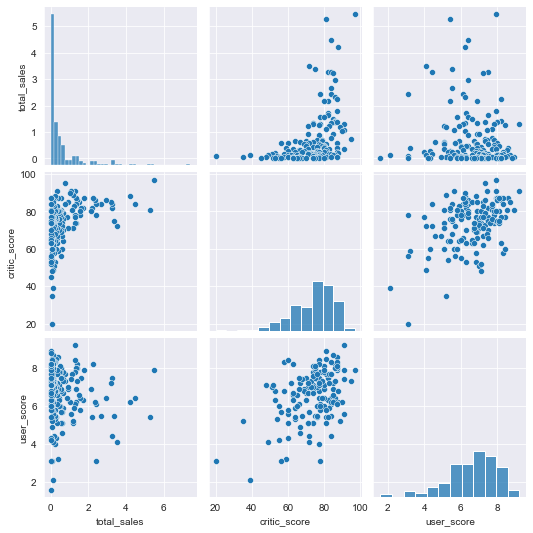

In [38]:
sbn.pairplot(actual_period_df[actual_period_df['platform'] == "xone"][['total_sales', 'critic_score', 'user_score']])
plt.show()

In [39]:
actual_period_df[actual_period_df['platform'] == "xone"][['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.428677,-0.070384
critic_score,0.428677,1.000000,0.440977
user_score,-0.070384,0.440977,1.000000


**Данные на платформе `xone` аналогичны. Корреляция между `total_sales` и `user_score` отрицательная, почти нулевая. Игры, у которых высокая оценка критиков как правило лучше продаются, есть игры, которые продаются не так хорошо, но имеют высокую оценку пользователей. Корреляция между `total_sale`s и `critic_scor`e равна 0.4.**

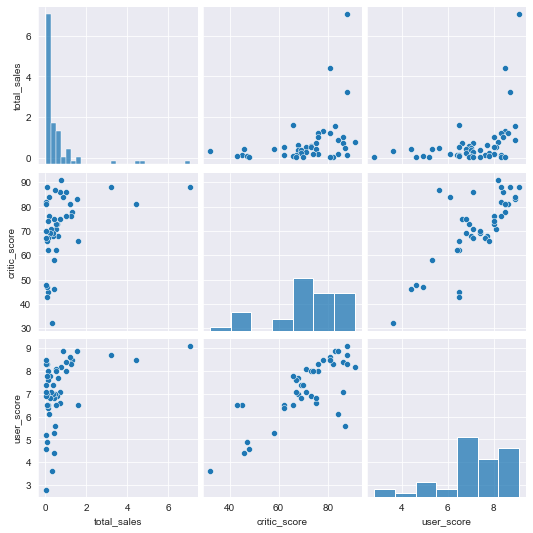

In [40]:
sbn.pairplot(actual_period_df[actual_period_df['platform'] == "wiiu"][['total_sales', 'critic_score', 'user_score']])
plt.show()

In [41]:
actual_period_df[actual_period_df['platform'] == "wiiu"][['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.370201,0.407926
critic_score,0.370201,1.000000,0.763536
user_score,0.407926,0.763536,1.000000


**А вот на плафторме `wiiu` видим, что корреляция между оценками пользователей и уровнем продаж положительная. Кореляция по оценке критиков чуть меньше, чем на предыдущих платформах.**

**У PS4, Xbox One, WiiU наблюдается связь между оценками критиков и продажами. А связь между оценками пользователей и продажами отрицательная у  `PS4, Xbox One`, либо её совсем нет. Только у WiiU корреляция между отзывами пользователей и продажами положительная. Это говорит о том, что покупатели прислушиваются больше к критикам, нежели к оценкам других пользователей. Но, опять же, пользователи платформы WiiU: смотрят на оценки других пользователей. Связь продаж с оценками критиков (`0,4`) слабая**

------------------

### Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [42]:
df_genre = actual_period_df.pivot_table(index = 'genre', values = 'total_sales', aggfunc = ['sum', 'count', 'median', 'mean'])     
df_genre.columns = ['sum_total_sales', 'count', 'median', 'mean']
df_genre = df_genre.sort_values(by = 'sum_total_sales', ascending=False).reset_index()
df_genre

,genre,sum_total_sales,count,median,mean
0,action,199.36,619,0.090,0.322068
1,shooter,170.94,128,0.515,1.335469
2,sports,109.48,161,0.180,0.680000
3,role-playing,101.44,221,0.110,0.459005
4,misc,37.55,113,0.090,0.332301
5,fighting,28.22,60,0.125,0.470333
6,racing,27.52,69,0.090,0.398841
7,platform,18.09,38,0.140,0.476053
8,adventure,17.55,185,0.030,0.094865
9,simulation,13.13,44,0.100,0.298409


Text(0, 0.5, 'Общие продажи')

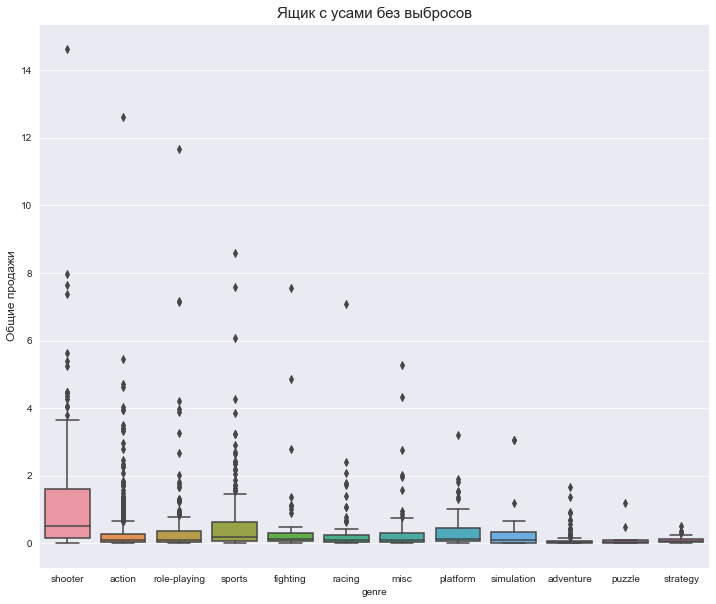

In [43]:
plt.figure(figsize=(12,10))
sbn.boxplot(data=actual_period_df, x='genre', y='total_sales')
plt.title('Ящик с усами без выбросов', fontsize=15)
plt.ylabel('Общие продажи',fontsize=12)

Text(0, 0.5, 'Общие продажи')

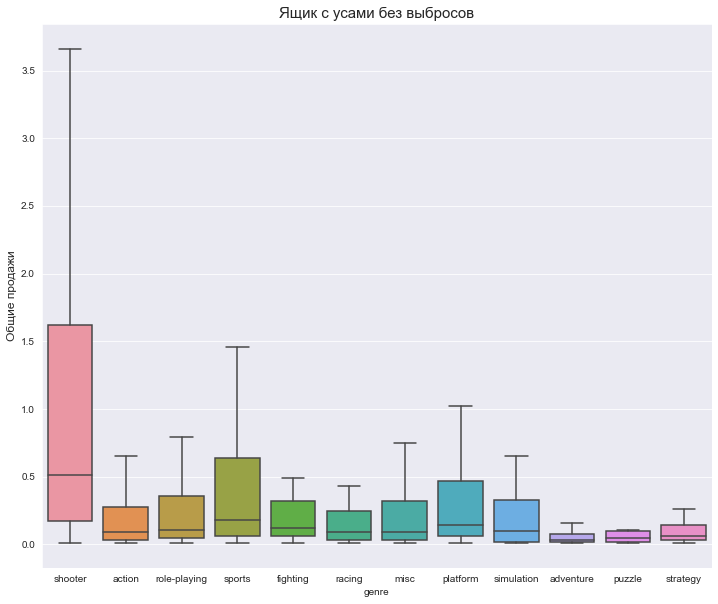

In [44]:
plt.figure(figsize=(12,10))
sbn.boxplot(data=actual_period_df, x='genre', y='total_sales', showfliers=False)
plt.title('Ящик с усами без выбросов', fontsize=15)
plt.ylabel('Общие продажи',fontsize=12)

**Самые продаваемые игры жанров: `Shooter, Role-Playing, Action`. При этом дисперсия жанра `Shooter` самая большая из всех жанров, а `Action` имеет самую маленькую дисперсию. Хуже всего в актуальном периоде продаются игры `Puzzle, Adventure и Strategy`, они имеют самый маленький размах и не имеют игр-хитов. Получается, что жанры с большим количеством продаж выделяются из общего распределения наличием большого числа игр-хитов, а игры с малым количеством продаж не могут похвастаться бестселлерами.**

**Вывод**

**Количество игр на игровые приставки и компьютеры начало расти с большой скоростью с 90х годов до 2008 года. Самые популярные игровые платформы за весь период : `Sony PlayStation 2, Xbox 360, Sony Playstation 3, Nintendo WII, Nintendo DS, Sony Playstation`. Средняя жизнь игровой платформы составляет 8-10 лет. Пик продаж наступает примерно через 5 лет после выхода приставки.
Больше всего было продано игр на `Sony Playstation и Xbox 360`. У анализируемых нами платформ наблюдается взаимосвязь между продажами и оценками критиков. Пользовательские же оценки почти не играют значимой роли. Это значит, что для людей мнение критиков важнее мнения других пользователей.
Самый популярный жанр: `Action`. Якорем висит жанр `Strategy`.**

-----------------------

# Шаг 4.

## Составляем портрет пользователя каждого региона





**Найдем самые популярные платформы (топ-5)**

In [45]:
#функция для поиска топ5 по регионам
def top_in_regions(groupby, region_sales, text):
    pivot = (
        actual_period_df.groupby([groupby])
        .agg({region_sales: 'sum'}).reset_index()
        .sort_values(by=region_sales, ascending=False)
        .reset_index(drop=True)[:5]
    )
    print(text)
    display(pivot)
    print('___________________')
    print()
    return pivot


In [46]:
na_sales_platform = top_in_regions('platform', 'na_sales', 'ТОП5 платформ Северной Америки')
#na_sales_platform

eu_sales_platform = top_in_regions('platform', 'eu_sales', 'ТОП5 платформ Европы')
#eu_sales_platform

jp_sales_platform = top_in_regions('platform', 'jp_sales', 'ТОП5 платформ Японии')
#jp_sales_platform

ТОП5 платформ Северной Америки


,platform,na_sales
0,ps4,98.61
1,xone,81.27
2,x360,28.30
3,3ds,22.64
4,ps3,22.05


___________________

ТОП5 платформ Европы


,platform,eu_sales
0,ps4,130.04
1,xone,46.25
2,ps3,25.54
3,pc,17.97
4,3ds,16.12


___________________

ТОП5 платформ Японии


,platform,jp_sales
0,3ds,44.24
1,ps4,15.02
2,psv,14.54
3,ps3,11.22
4,wiiu,7.31


___________________



In [60]:
#Соединяем полученные выше таблицы(топ5)
platform_merge = pd.merge(na_sales_platform, jp_sales_platform, how="outer", on='platform')
platform_merge = pd.merge(eu_sales_platform, platform_merge, how='outer', on='platform')
platform_merge

,platform,eu_sales,na_sales,jp_sales
0,ps4,130.04,98.61,15.02
1,xone,46.25,81.27,NaN
2,ps3,25.54,22.05,11.22
3,pc,17.97,NaN,NaN
4,3ds,16.12,22.64,44.24
5,x360,NaN,28.30,NaN
6,psv,NaN,NaN,14.54
7,wiiu,NaN,NaN,7.31


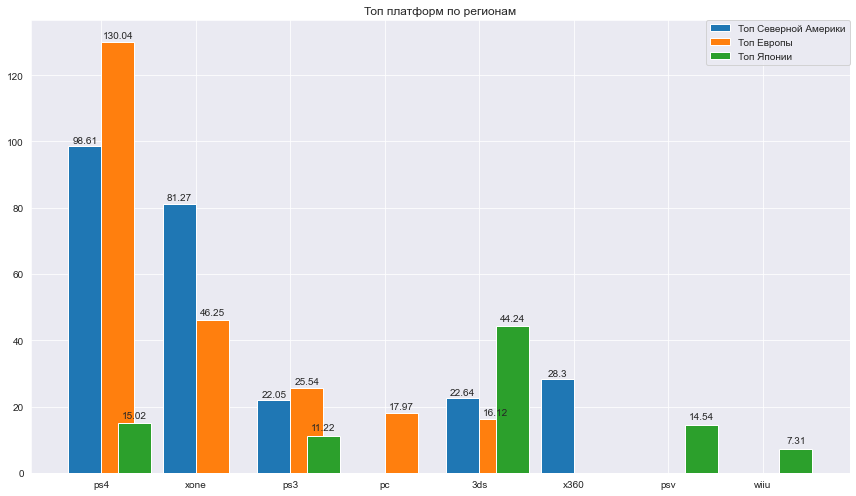

In [48]:

x = np.arange(len(platform_merge['platform']))  
width = 0.35  

fig, ax = plt.subplots(figsize=(12, 7))
rects1 = ax.bar(x - width/2, platform_merge['na_sales'], width, label='Топ Северной Америки')
rects2 = ax.bar(x + width/2,  platform_merge['eu_sales'], width, label='Топ Европы')
rects3 = ax.bar(x + width,  platform_merge['jp_sales'], width, label='Топ Японии')

ax.set_title('Топ платформ по регионам')
ax.set_xticks(x, platform_merge['platform'])
ax.legend(loc='upper right', borderaxespad=0)

ax.bar_label(rects1, padding=1)
ax.bar_label(rects2, padding=2)
ax.bar_label(rects3, padding=3)

fig.tight_layout()

plt.show()

**В `NA` и `EU` самые популярные платформы практически совпадают, отличаются лишь расположением мест.
В `JP` топ сильно отличается от `NA и EU`, в топ5 входят такие платформы как: `psv`, `wiiu` - которые отсуствуют в `NA и EU`. `PS4` - популярна, входит в топ5 всех перечисленных регионов.**

----------------------

**Найдем самые популярные топ5 жанров для каждого региона.**

In [49]:
   
na_sales_genre = top_in_regions('genre', 'na_sales', 'ТОП5 жанров Северной америки')
#na_sales_genre

eu_sales_genre = top_in_regions('genre', 'eu_sales', 'ТОП5 жанров Европы')
#eu_sales_genre

jp_sales_genre = top_in_regions('genre', 'jp_sales', 'ТОП5 жанров Японии')
#jp_sales_genre

ТОП5 жанров Северной америки


,genre,na_sales
0,shooter,79.02
1,action,72.53
2,sports,46.13
3,role-playing,33.47
4,misc,15.05


___________________

ТОП5 жанров Европы


,genre,eu_sales
0,action,74.68
1,shooter,65.52
2,sports,45.73
3,role-playing,28.17
4,racing,14.13


___________________

ТОП5 жанров Японии


,genre,jp_sales
0,role-playing,31.16
1,action,29.58
2,fighting,6.37
3,misc,5.61
4,shooter,4.87


___________________



In [50]:
#Соединяем полученные выше таблицы(топ5)
genre_merge = pd.merge(na_sales_genre, jp_sales_genre, how="outer", on="genre")
genre_merge = pd.merge(eu_sales_genre, genre_merge, how='outer', on='genre')
genre_merge

,genre,eu_sales,na_sales,jp_sales
0,action,74.68,72.53,29.58
1,shooter,65.52,79.02,4.87
2,sports,45.73,46.13,NaN
3,role-playing,28.17,33.47,31.16
4,racing,14.13,NaN,NaN
5,misc,NaN,15.05,5.61
6,fighting,NaN,NaN,6.37


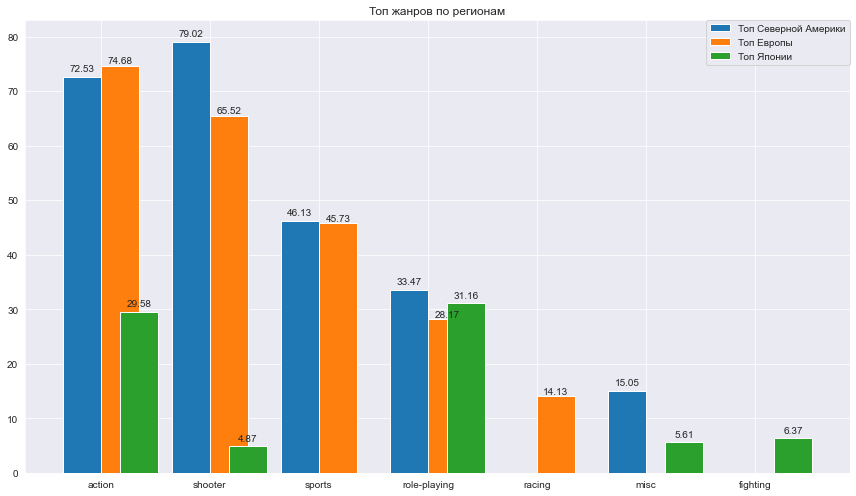

In [51]:
x = np.arange(len(genre_merge['genre']))  
width = 0.35  

fig, ax = plt.subplots(figsize=(12, 7))
rects1 = ax.bar(x - width/2, genre_merge['na_sales'], width, label='Топ Северной Америки')
rects2 = ax.bar(x + width/2,  genre_merge['eu_sales'], width, label='Топ Европы')
rects3 = ax.bar(x + width, genre_merge['jp_sales'], width, label='Топ Японии')


ax.set_title('Топ жанров по регионам')
ax.set_xticks(x, genre_merge['genre'])
ax.legend(loc='upper right', borderaxespad=0)

ax.bar_label(rects1, padding=4)
ax.bar_label(rects2, padding=0)
ax.bar_label(rects3, padding=3)

fig.tight_layout()

plt.show()

**В `NA` и `EU` самые популярные жанры практически совпадают. Отличаются лишь пятые места в `NA` это `Misc`, а в `EU` это `Racing` так же выделим что жанр `Racing` отсуствует в топ 5 `NA и JP`. 
В `JP` же вкусы сильно отличаются от `NA и EU`, на первом месте стоит жанр `role-playing`, жанр `Shooter` на последнем месте в отличии от `NA и EU`, где он лидирует**

-----------------------

**Влияет ли рейтинг ESRB на продажи в отдельном регионе?**

In [52]:
na_sales_rating = top_in_regions('rating', 'na_sales', 'Рейтинг в Северной Америке')
#na_sales_rating

eu_sales_rating = top_in_regions('rating', 'eu_sales', 'Рейтинг в Европе')
#eu_sales_rating

jp_sales_rating = top_in_regions('rating', 'jp_sales', 'Рейтинг в Японии')
#jp_sales_rating

Рейтинг в Северной Америке


,rating,na_sales
0,m,96.42
1,tbd,64.72
2,e,50.74
3,t,38.95
4,e10+,33.23


___________________

Рейтинг в Европе


,rating,eu_sales
0,m,93.44
1,tbd,58.95
2,e,58.06
3,t,34.07
4,e10+,26.16


___________________

Рейтинг в Японии


,rating,jp_sales
0,tbd,56.90
1,t,14.78
2,e,8.94
3,m,8.01
4,e10+,4.46


___________________



In [53]:
#Соединяем полученные выше таблицы(топ5)
rating_merge = pd.merge(na_sales_rating, jp_sales_rating, how="outer", on="rating")
rating_merge = pd.merge(eu_sales_rating, rating_merge, how='outer', on='rating')
rating_merge

,rating,eu_sales,na_sales,jp_sales
0,m,93.44,96.42,8.01
1,tbd,58.95,64.72,56.90
2,e,58.06,50.74,8.94
3,t,34.07,38.95,14.78
4,e10+,26.16,33.23,4.46


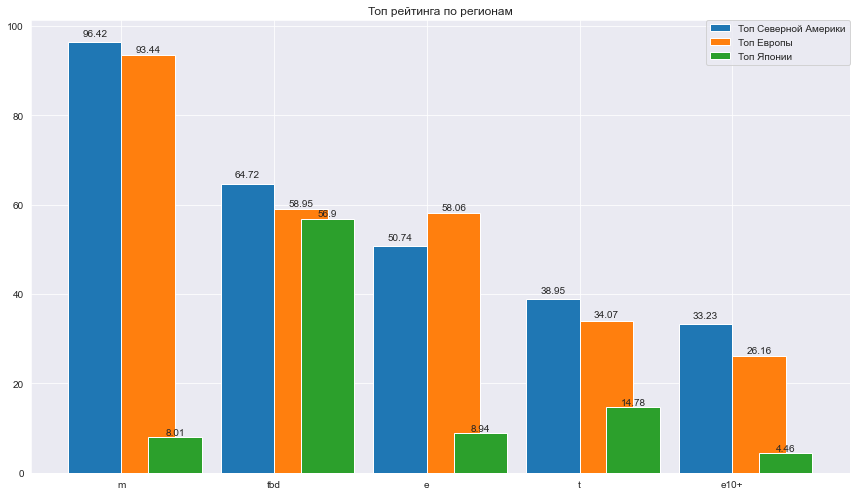

In [54]:
x = np.arange(len(rating_merge['rating']))  
width = 0.35  

fig, ax = plt.subplots(figsize=(12,7))
rects1 = ax.bar(x - width/2, rating_merge['na_sales'], width, label='Топ Северной Америки')
rects2 = ax.bar(x + width/2,  rating_merge['eu_sales'], width, label='Топ Европы')
rects3 = ax.bar(x + width, rating_merge['jp_sales'], width, label='Топ Японии')


ax.set_title('Топ рейтинга по регионам')
ax.set_xticks(x, rating_merge['rating'])
ax.legend(loc='upper right', borderaxespad=0)

ax.bar_label(rects1, padding=4)
ax.bar_label(rects2, padding=1)
ax.bar_label(rects3, padding=0)

fig.tight_layout()

plt.show()

**Описание значений рейтинга:** 

- «EC» («Early childhood») — «Для детей младшего возраста»:
- «E» («Everyone») — «Для всех»
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «T» («Teen») — «Подросткам»
- «M» («Mature») — «Для взрослых»
- «AO» («Adults Only 18+») — «Только для взрослых»
- "K-A" for Kids to Adults: Games that contain content that is suitable for a general audience. This rating was used until the year 1998 when it renamed to E.
- tbd - не определен

**На первом месте в `JP` рейтинг `tbd` (не определен) возможно это потому что в Японии своя система возрастных рейтингов вместо `ESRB` у них `CERO`, поэтому не все игры подвреглись присваению рейтинга от ассоциации. В `NA и EU` в лидерах игры с рейтингом `Для взрослых`.**

**Вывод**

Самые популярные игровые платформы в *Северной Америке* это: `PS4, XONE, X360, PS3, 3DS`. Топ 5 жанров в северной америке : `shooter, action, sports, role-playing, misc`. По рейтингам видно, что больше всего продаж у игр с рейтингом `Для взрослых`, так же в топе игры с рейтингом `Для всех` и игры с рейтингом `Подросткам`.

Самые популярные игровые платформы в *Европе* это: `PS4, XONE, PS3, PC, 3DS`. Топ 5 жанров в Европе : `action, shooter, sports, role-playing, racing`. По рейтингам видно, что больше всего продаж у игр с рейтингом `Для взрослых`, так же в топе игры с рейтингом `Для всех` и игры с рейтингом `Подросткам`.

Самые популярные игровые платформы в *Японии* это: `3DS, PS4, PSV, PS3, WiiU`. Топ 5 жанров в Японии : `Role-Playing, action, fighting, misc, shooter`. По рейтингам видно, что больше всего продаж у игр с рейтингом `Подросткам`, так же игры с рейтингом `Для всех` и игры с рейтингом `Для взрослых`.

Для прогноза будущих мы взяли данные за последние 2 года, так как технологии стремительно развиваются, а вкусы людей могут меняться очень быстро. Соответственно, для 2017 года большую часть прибыли будут приносить игры жанра `Shooter`, для платформы `PS4` и с рейтингом от 17 и выше. На втором месте по продажам разместятся игры жанра `Action`, для платформы `PS4` и с рейтингом "для всех". И замкнут тройку лидеров тоже игры жанра `Shooter` с тем же рейтингом от 17 и выше, но уже для платформы `XOne`.

-----------------------------

# Шаг 5.

## Проверка гипотез:

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

--------------------------------
### Проверка первой гипотезы

*Нулевая гипотеза*: Средние пользовательские рейтинги платформ Xbox One и PC - `равны`

*Альтернативная гипотеза*: Средний пользовательские рейтингни платформ Xbox One и PC - `НЕ равны`

In [55]:
#Возьмем срез: актуальный период, без пропусков
actual_period_df = actual_period_df.query('user_score.notna()')
actual_period_df['user_score'].isna().sum()

0

In [56]:
print('Средний рейтинг пользователей Xbox One', round(actual_period_df.query('platform == "xone"')['user_score'].mean(), 2))
print('Средний рейтинг пользователей PC', round(actual_period_df.query('platform == "pc"')['user_score'].mean(), 2))

Средний рейтинг пользователей Xbox One 6.59
Средний рейтинг пользователей PC 6.3


In [57]:
alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    actual_period_df.query('platform == "xone"')['user_score'], 
    actual_period_df.query('platform == "pc"')['user_score'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


**Тест показал, что нам не получилось отвергнуть нулевую гипотезу. Можем сделать вывод, что средние пользовательские рейтинги платформ Xbox One и PC равны!**

------------------------

### Проверка второй гипотезы

*Нулевая гипотеза*: Средние пользовательские рейтинги жанров Action и Sports - `равны`

*Альтернативная гипотеза*: Средние пользовательские рейтинги жанров Action  и Sports - `НЕ равны`

In [58]:
print('Средний рейтинг пользователей Action', round(actual_period_df.query('genre == "action"')['user_score'].mean(), 2))
print('Средний рейтинг пользователей Sports', round(actual_period_df.query('genre == "sports"')['user_score'].mean(), 2))

Средний рейтинг пользователей Action 6.76
Средний рейтинг пользователей Sports 5.23


In [59]:
alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    actual_period_df.query('genre == "action"')['user_score'], 
    actual_period_df.query('genre == "sports"')['user_score'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


**Тест показал, что мы отвергаем нулевую гипотезу. Можем сделать вывод, что средние пользовательские рейтинги жанров Action и Sports разные.**

-------------

### Вывод
 
 **Проверили гипотезы по функции ttest_ind, вычисляющей t-тест двух независимых выборок:**

- Гипотеза: "Средние пользовательские рейтинги платформ Xbox one и PC одинаковые". Не получилось отвергнуть нулевую гипотезу

- Гипотеза: "Средние пользовательские рейтинги жанров Action и Sports разные". Отвергаем нулевую гипотезу.

# Шаг 6.

## Общий вывод

Данные которые изначально были нам данны, имели пропуски, неправльные типы столбцов. Сначала я привел названия столбцов к нижнему регистру, избавился от пропусков, изменил типы столбцов.

Затем приступил к иследовательскому анализу данных:
- Посмотрел сколько игр выпускалось в разные года: 

*Начиная с 1990 года количество выпущенных игр начало значительно увеличиваться, пик выпущенных игр пришелся на 2007-2010 года. Начиная с 2000 года количество выпущенных игр в год не опускалось ниже 400 игр в год. Увеличение релизов еще связано с тем, что увеличивалось число различных платформ и некоторые игры выпускались сразу на нескольких платформах.*

- Посмотрел, как менялись продажи по платформам:

*В среднем платформы популярны 8-10 лет. На смену одной платформе приходит другая, допустим в начале 2000х PS теряет популярность, потому что производитель Sony выпускает PS2 и так далее и по сей день.*

- Посмотрел какие платформы лидируют по продажам в актуальном периоде:

*Взглянув на диаграммы распределения, можно сделать вывод, что среди платформ уверенно лидирует Ps4, так же видим, как в период с 2014-2015 год на смену старым версиям приставок x360 и ps3 пришло новое поколение приставок Ps4 и xone. Данные за 2016 год немного искажают видимость, потому что в базе данных представлен не весь год.*

- Собрал график «ящик с усами» по глобальным продажам игр в разбивке по платформам:

*Больше всех продаж у WiiU и XOne, далее идут PS4, 3DS, PC и PSV на последнем месте. Исходя из графиков и описания видно, что медиана протекает у всех по разному.Успех WiiU можно понять по причине цен относительно остальных приставок, в кризис 2008 года, Wii была спасением для многих семей, на консоль была поставлена цена в 200 долларов, в отличии от Xbox 360 и PS3 за 300долларов и 500долларов соответственно. Положение Xbox One и PlayStation 4 можно объяснить тем, что данные приставки позднее остальных вышли на рынки. Часть стран увидела их в конце 2013, часть только во второй половине 2014.
ПК на данном промежутке времени отошли на второй план, уступив место приставкам.*

- Посмотрел, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков:

*Корреляция между total_sales и user_score отрицательная, почти нулевая. Игры, у которых высокая оценка критиков как правило лучше продаются, есть игры, которые продаются не так хорошо, но имеют высокую оценку пользователей. Корреляция между total_sales и critic_score равна 0.4, что ожидаемо, мы углядели эту зависимость на графике.*

- Соотнесли выводы с продажами игр на других платформах:

*У PS4, Xbox One, WiiU наблюдается связь между оценками критиков и продажами. А связь между оценками пользователей и продажами отрицательная у PS4, Xbox One, либо её совсем нет. Только у WiiU корреляция между отзывами пользователей и продажами положительная. Это говорит о том, что покупатели прислушиваются больше к критикам, нежели к оценкам других пользователей. Но, опять же, пользователи платформы WiiU: смотрят на оценки других пользователей.*

- Посмотрел на общее распределение игра по жанрам:

*Самые продаваемые игры жанров: Shooter, Role-Playing, Action. При этом дисперсия жанра Shooter самая большая из всех жанров, а Action имеет самую маленькую дисперсию. Хуже всего в актуальном периоде продаются игры Puzzle, Adventure и Strategy, они имеют самый маленький размах и не имеют игр-хитов. Получается, что жанры с большим количеством продаж выделяются из общего распределения наличием большого числа игр-хитов, а игры с малым количеством продаж не могут похвастаться бестселлерами..*

**Портрет пользовтаеля для каждого региона:**

Если брать данные за последние 2 года (2014-2016):

**в Северной Америке:**

- Топ игровых платформ выглядит так: PS4, Xone, X360;
- Топ Жанров игр: Shooter, Action, Sports;
- Топ Рейтингов игр: "Для взрослых" , "Подросткам" и "Для всех".

**В Европейском Союзе:**

- Топ игровых платформ : PS4, Xone, PC;
- Топ жанров: Shooter, Sports, Action;
- Топ рейтингов: "Для врзослых", "Для всех", "Подросткам".

**В Японии:**

- Топ игровых платформ : 3DS, PS4, PSV;
- Топ жанров: Action, Role-playing, Fighting;
- Топ рейтингов: "Подросткам", "Для всех", "Для взрослых".

**Проверили гипотезы:**

Средние пользовательские рейтинги платформ Xbox One и PC равны - `Подтвердилась`

Средние пользовательские рейтинги жанров Action и Sports разные -  `Подтвердилась`